In [218]:
# load libraries
suppressMessages(library(tidyverse))
suppressMessages(library(lmerTest))

In [562]:
# df_responses <- read.csv("zv_task_questionnaire_replication.csv")
df_responses <- read.csv("zv_task_questionnaire_replication.csv")

In [563]:
library(dplyr)

# # Check that df_responses exists and has data
# glimpse(df_responses)  # just to confirm

# Now filter the rows
df_experimental <- df_responses %>%
  filter(trialType == "experimental")

# Convert variables to factors
df_experimental <- df_experimental %>%
  mutate(
    trialIndex = as.factor(trialIndex),
    isMatch = as.factor(isMatch),
    subject = as.factor(subject),
    hit = as.factor(hit)
  )


In [595]:
#create sub dataset with experimental trials only
df_experimental <- filter(df_responses, trialType=="experimental")
df_experimental$trialIndex <- as.factor(df_experimental$trialIndex)
df_experimental$isMatch <- as.factor(df_experimental$isMatch)
df_experimental$subject <- as.factor(df_experimental$subject)
df_experimental$hit <- as.factor(df_experimental$hit)
# df_rt_correct <- subset(df_experimental, hit == 1)

In [566]:
# df_experimental %>%
#   summarise(
#     min_img_rt = min(rt_img, na.rm = TRUE),
#     max_img_rt = max(rt_img, na.rm = TRUE),
#     mean_img_rt = mean(rt_img, na.rm = TRUE),
#     sd_img_rt = sd(rt_img, na.rm = TRUE)
#   )

# # df_experimental <- df_experimental %>%
# #   filter(rt_img <= 3000)

# n_before <- nrow(df_experimental)
# df_experimental <- df_experimental %>% filter(rt_img <= 3000)
# df_experimental <- df_experimental %>% filter(rt_sent <= 3000)
# n_after <- nrow(df_experimental)
# n_removed <- n_before - n_after
# print(paste("Removed", n_removed, "rows."))

# df_experimental %>%
#   summarise(
#     min_img_rt = min(rt_img, na.rm = TRUE),
#     max_img_rt = max(rt_img, na.rm = TRUE),
#     mean_img_rt = mean(rt_img, na.rm = TRUE),
#     sd_img_rt = sd(rt_img, na.rm = TRUE)
#   )


In [568]:
# library(dplyr)
# library(gt)

# # Step 1: Compute subject-level means
# subject_summary <- df_responses %>%
#   mutate(
#     hit = as.numeric(as.character(hit)),
#     Condition = recode(isMatch, "n" = "Mismatch", "y" = "Match")
#   ) %>%
#   filter(!is.na(hit)) %>%
#   group_by(subject, Condition) %>%
#   summarise(
#     mean_rt = mean(rt_img, na.rm = TRUE),
#     mean_acc = mean(hit, na.rm = TRUE),
#     .groups = "drop"
#   )

# # Step 2: Compute condition-level summary with SEs across subjects
# summary_table <- subject_summary %>%
#   group_by(Condition) %>%
#   summarise(
#     RT_M = round(mean(mean_rt), 0),
#     RT_SE = round(sd(mean_rt) / sqrt(n()), 0),
#     Accuracy_M = round(mean(mean_acc), 2),
#     Accuracy_SE = round(sd(mean_acc) / sqrt(n()), 3),
#     .groups = "drop"
#   ) %>%
#   mutate(
#     Accuracy_M = ifelse(abs(Accuracy_M) < 1, sub("^0", "", as.character(Accuracy_M)), as.character(Accuracy_M)),
#     Accuracy_SE = ifelse(abs(Accuracy_SE) < 1, sub("^0", "", as.character(Accuracy_SE)), as.character(Accuracy_SE))
#   )

# # Step 3: Format and build the gt table
# summary_gt <- summary_table %>%
#   gt() %>%
#   tab_header(
#     title = md("**Table 1.** Mean accuracies and reaction times and SE in the sentence-picture verification task.")
#   ) %>%
#   cols_label(
#     RT_M = md("**M**"),
#     RT_SE = md("**SE**"),
#     Accuracy_M = md("**M**"),
#     Accuracy_SE = md("**SE**")
#   ) %>%
#   tab_spanner(
#     label = md("**Response Time**"),
#     columns = c(RT_M, RT_SE)
#   ) %>%
#   tab_spanner(
#     label = md("**Accuracy**"),
#     columns = c(Accuracy_M, Accuracy_SE)
#   ) %>%
#   cols_align(align = "center", columns = everything()) %>%
#   tab_options(
#     table.font.size = px(20),
#     table.font.names = "Garamond",
#     table.align = "left",
#     column_labels.font.weight = "bold",
#     data_row.padding = px(5)
#   )

# # Step 4: Save the table
# gtsave(summary_gt, "table1_match_effect.png")
# gtsave(summary_gt, filename = "table1_match_effect.html")

In [569]:
library(knitr)

df_responses %>%
  mutate(hit = as.numeric(as.character(hit))) %>%
  filter(!is.na(hit)) %>%
  group_by(isMatch) %>%
  summarise(
    `Mean Image RT (ms)` = round(mean(rt_img, na.rm = TRUE), 2),
    `Mean Sentence RT (ms)` = round(mean(rt_sent, na.rm = TRUE), 2),
    `Mean Accuracy` = round(mean(hit, na.rm = TRUE), 2),
    `Trial Count` = n(),
    .groups = "drop"
  ) %>%
  kable(
    caption = "Table 1. Descriptive statistics by match condition",
    format = "html"
  )

Warning message:
“'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")”
Warning message:
“'xfun::attr()' is deprecated.
Use 'xfun::attr2()' instead.
See help("Deprecated")”


<table>
<caption>Table 1. Descriptive statistics by match condition</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> isMatch </th>
   <th style="text-align:right;"> Mean Image RT (ms) </th>
   <th style="text-align:right;"> Mean Sentence RT (ms) </th>
   <th style="text-align:right;"> Mean Accuracy </th>
   <th style="text-align:right;"> Trial Count </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> n </td>
   <td style="text-align:right;"> 964.16 </td>
   <td style="text-align:right;"> 1095.70 </td>
   <td style="text-align:right;"> 0.93 </td>
   <td style="text-align:right;"> 3081 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> y </td>
   <td style="text-align:right;"> 894.90 </td>
   <td style="text-align:right;"> 1132.97 </td>
   <td style="text-align:right;"> 0.95 </td>
   <td style="text-align:right;"> 3124 </td>
  </tr>
</tbody>
</table>

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


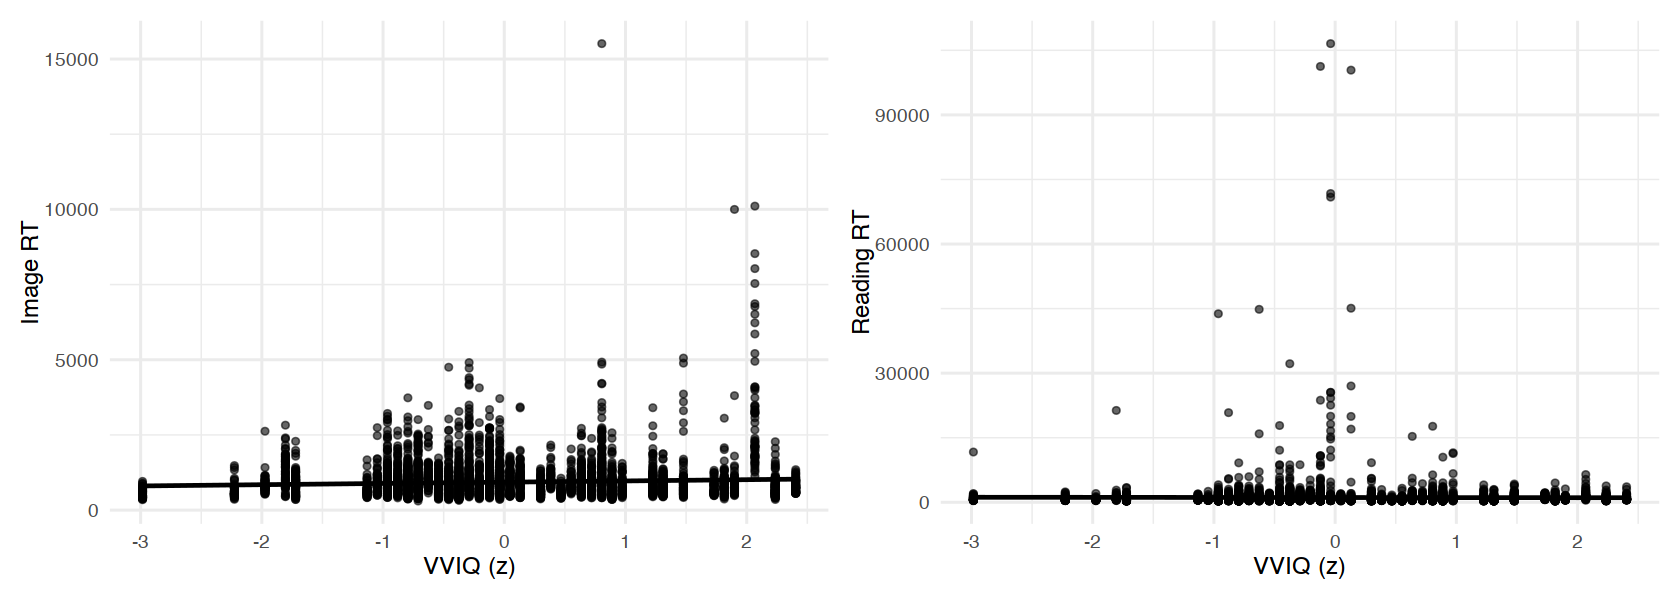

In [571]:
library(patchwork)

p_img <- ggplot(df_experimental, aes(x = vviq_z, y = rt_img)) +
  geom_point(alpha = 0.6, size = 1.5) +
  geom_smooth(method = "lm", se = FALSE, color = "black") +
  labs(x = "VVIQ (z)", y = "Image RT") +
#   ylim(300, 3000) +
  theme_minimal(base_size = 14)

p_read <- ggplot(df_experimental, aes(x = vviq_z, y = rt_sent)) +
  geom_point(alpha = 0.6, size = 1.5) +
  geom_smooth(method = "lm", se = FALSE, color = "black") +
  labs(x = "VVIQ (z)", y = "Reading RT") +
#   ylim(300, 3000) +
  theme_minimal(base_size = 14)

p_img + p_read


Warning message:
“Removed 64 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 64 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 64 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 150 rows containing missing values (`geom_violin()`).”
Warning message:
“Removed 209 rows containing missing values (`geom_violin()`).”


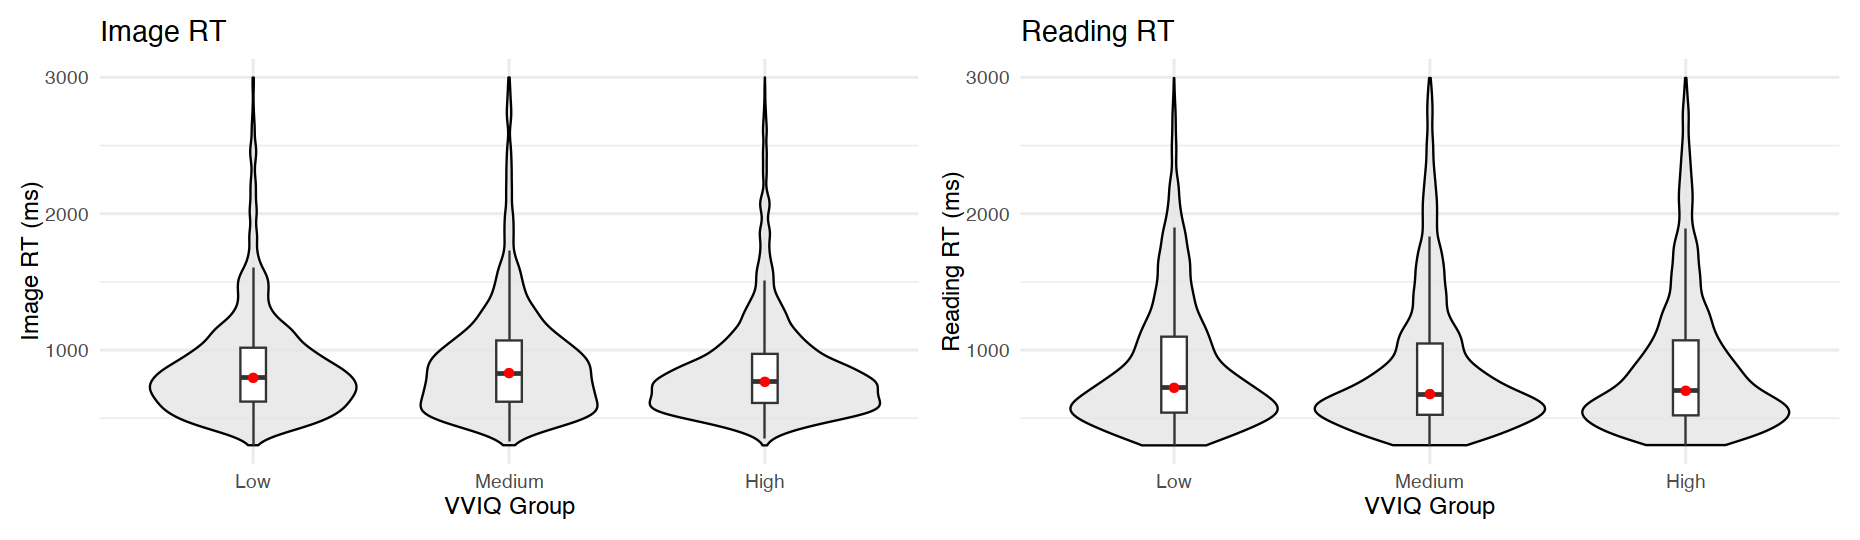

In [594]:
library(patchwork)

library(dplyr)

df_clean <- df_clean %>%
  mutate(vviq_group = ntile(vviq_z, 3)) %>%
  mutate(vviq_group = factor(vviq_group, labels = c("Low", "Medium", "High")))


p_img <- ggplot(df_clean, aes(x = vviq_group, y = rt_img)) +
  geom_violin(fill = "gray90", color = "black", alpha = 0.8, trim = FALSE) +
  geom_boxplot(width = 0.1, outlier.shape = NA, fill = "white") +
  stat_summary(fun = median, geom = "point", shape = 20, size = 3, color = "red") +
  labs(x = "VVIQ Group", y = "Image RT (ms)", title = "Image RT") +
  ylim(300, 3000) +
  theme_minimal(base_size = 14)

p_read <- ggplot(df_clean, aes(x = vviq_group, y = rt_sent)) +
  geom_violin(fill = "gray90", color = "black", alpha = 0.8, trim = FALSE) +
  geom_boxplot(width = 0.1, outlier.shape = NA, fill = "white") +
  stat_summary(fun = median, geom = "point", shape = 20, size = 3, color = "red") +
  labs(x = "VVIQ Group", y = "Reading RT (ms)", title = "Reading RT") +
  ylim(300, 3000) +
  theme_minimal(base_size = 14)

p_img + p_read


In [573]:
df_clean

subject,isMatch,mean_rt_img,proportion_correct,percentage_correct,trial_index,trialIndex,sentence,image,trialType,⋯,vviq_z,irq_visual_z,irq_verbal_z,irq_ortho_z,irq_manipulation_z,osviq_object_z,osviq_spatial_z,osviq_verbal_z,rt_sent_z,vviq_group
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
09g1jpab,n,1350.750,1,100,12,20,"<div style=""font-size: 30px;"">There was a lobster in the sea.</div>","<img src=""Images/lobstermeat.jpg""/>",experimental,⋯,-1.80546,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707,2.01644834,Low
09g1jpab,n,1350.750,1,100,24,55,"<div style=""font-size: 30px;"">There was lemon in the drink.</div>","<img src=""Images/lemon.jpg""/>",experimental,⋯,-1.80546,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707,0.19673576,Low
09g1jpab,n,1350.750,1,100,27,56,"<div style=""font-size: 30px;"">There was soap in the bath.</div>","<img src=""Images/soapbar.jpg""/>",experimental,⋯,-1.80546,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707,-0.08124344,Low
09g1jpab,n,1350.750,1,100,36,19,"<div style=""font-size: 30px;"">There was a swiss knife in his pocket.</div>","<img src=""Images/swissknife.jpg""/>",experimental,⋯,-1.80546,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707,1.28529296,Low
09g1jpab,n,1350.750,1,100,51,59,"<div style=""font-size: 30px;"">There was an egg on the pan.</div>","<img src=""Images/egg.jpg""/>",experimental,⋯,-1.80546,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707,-1.01329134,Low
09g1jpab,n,1350.750,1,100,84,49,"<div style=""font-size: 30px;"">There was apple in the salad.</div>","<img src=""Images/apple.jpg""/>",experimental,⋯,-1.80546,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707,2.42524128,Low
09g1jpab,n,1350.750,1,100,87,51,"<div style=""font-size: 30px;"">There was wool in the sweater.</div>","<img src=""Images/woolball.jpg""/>",experimental,⋯,-1.80546,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707,0.22009536,Low
09g1jpab,n,1350.750,1,100,90,16,"<div style=""font-size: 30px;"">There was a shoelace in the package.</div>","<img src=""Images/shoelacetied.jpg""/>",experimental,⋯,-1.80546,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707,-0.66990527,Low
09g1jpab,n,1350.750,1,100,99,25,"<div style=""font-size: 30px;"">There was a pumpkin on the cart.</div>","<img src=""Images/pumpkinface.jpg""/>",experimental,⋯,-1.80546,-1.176277,-3.542781,-1.710412,-1.623169,-1.113731,-1.740831,1.938707,-0.18636162,Low


#### RQ1: Do language comprehenders represent the implied shape of objects in sentences?
#### Specifically, are they slower when implied shape in a sentence does not match depicted shape in an image? 

In [574]:
model1_rt <- lmer(data=df_experimental,
                    rt_img ~ isMatch  + 
                      (1 | subject) +
                      (1 | trialIndex)
                    )

model1_hit <- glmer(data = df_experimental,
                    hit ~ isMatch + 
                      (1 | subject) +
                      (1 | trialIndex),
                    family = binomial)

summary(model1_rt)
summary(model1_hit)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt_img ~ isMatch + (1 | subject) + (1 | trialIndex)
   Data: df_experimental

REML criterion at convergence: 94439.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3822 -0.3987 -0.1354  0.1926 28.0366 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept) 115300   339.56  
 trialIndex (Intercept)   9991    99.95  
 Residual               221361   470.49  
Number of obs: 6205, groups:  subject, 111; trialIndex, 60

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   958.07      35.74  145.92  26.803  < 2e-16 ***
isMatchy      -68.40      11.96 6035.91  -5.721 1.11e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr)
isMatchy -0.169

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: hit ~ isMatch + (1 | subject) + (1 | trialIndex)
   Data: df_experimental

     AIC      BIC   logLik deviance df.resid 
  2120.8   2147.8  -1056.4   2112.8     6201 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-12.9992   0.0961   0.1365   0.1986   2.1155 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept) 1.656    1.287   
 trialIndex (Intercept) 1.031    1.016   
Number of obs: 6205, groups:  subject, 111; trialIndex, 60

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   3.5922     0.2160  16.630  < 2e-16 ***
isMatchy      0.4548     0.1305   3.487 0.000489 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr)
isMatchy -0.238

In [575]:
library(dplyr)
library(tidyr)
library(effectsize)

# Step 1: Get median RTs for each subject and condition
subject_medians <- df_experimental %>%
  group_by(subject, isMatch) %>%
  summarise(median_rt = median(rt_img, na.rm = TRUE), .groups = "drop") %>%
  pivot_wider(names_from = isMatch, values_from = median_rt, names_prefix = "isMatch_")  # will create isMatch_n and isMatch_y

# Step 2: Get vviq_z per subject
subject_vviq <- df_experimental %>%
  group_by(subject) %>%
  summarise(vviq_z = first(vviq_z), .groups = "drop")

# Step 3: Merge medians with vviq_z
subject_medians <- subject_medians %>%
  left_join(subject_vviq, by = "subject")

# Step 4: Paired t-test comparing median RTs for Match vs Mismatch
t_test_result <- t.test(subject_medians$isMatch_y, subject_medians$isMatch_n, paired = TRUE)

# Step 5: View results
print(t_test_result)
cohens_d(t_test_result)

# # Optional: View the merged table
# head(subject_medians)


	Paired t-test

data:  subject_medians$isMatch_y and subject_medians$isMatch_n
t = -3.5572, df = 110, p-value = 0.0005543
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -68.03605 -19.35134
sample estimates:
mean of the differences 
              -43.69369 



For paired samples, 'repeated_measures_d()' provides more options.



,Cohens_d,CI,CI_low,CI_high
,<dbl>,<dbl>,<dbl>,<dbl>
difference in means,-0.3376345,0.95,-0.5282025,-0.1456129


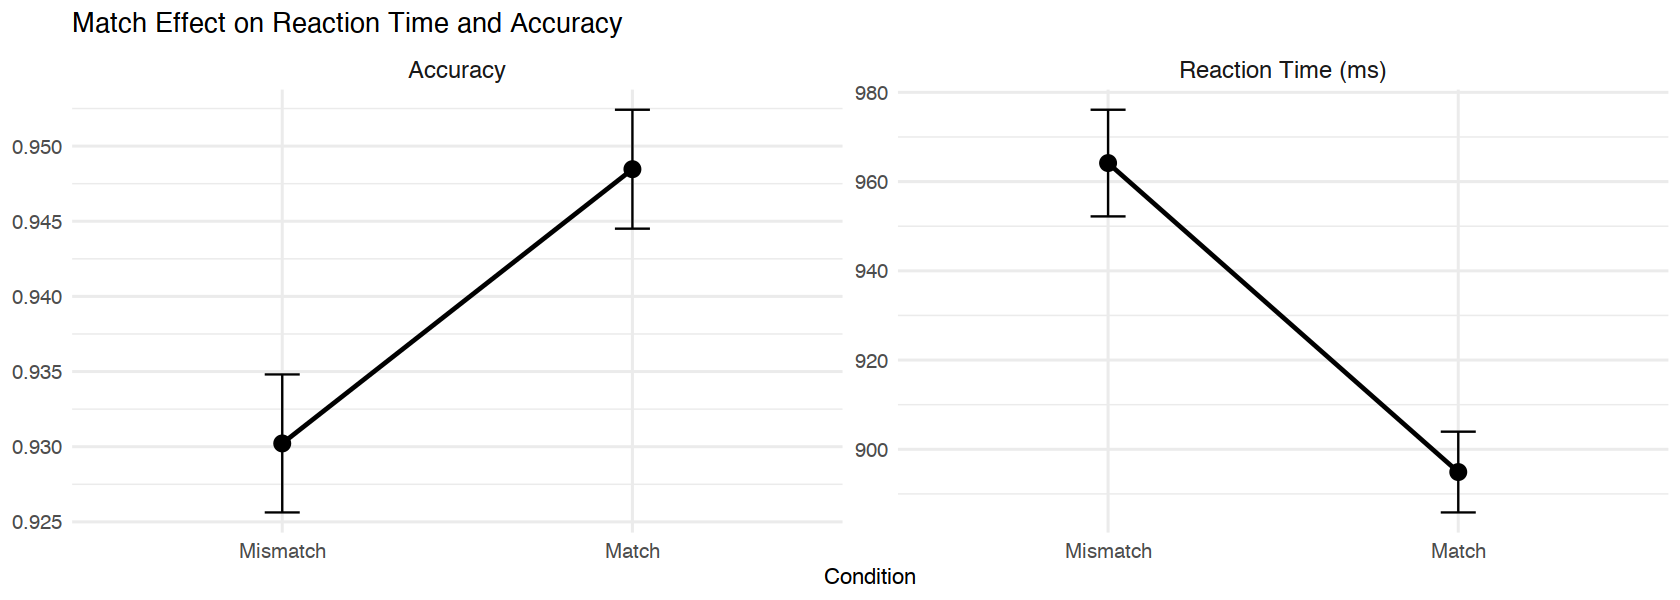

In [576]:
library(dplyr)
library(tidyr)
library(ggplot2)

# Step 1: Summarize
summary_stats <- df_experimental %>%
  mutate(
    Condition = recode(isMatch, "n" = "Mismatch", "y" = "Match"),
    hit = as.numeric(as.character(hit))
  ) %>%
  group_by(Condition) %>%
  summarise(
    rt_mean = mean(rt_img, na.rm = TRUE),
    rt_se = sd(rt_img, na.rm = TRUE) / sqrt(n()),
    acc_mean = mean(hit, na.rm = TRUE),
    acc_se = sd(hit, na.rm = TRUE) / sqrt(n()),
    .groups = "drop"
  ) %>%
  pivot_longer(
    cols = c(rt_mean, rt_se, acc_mean, acc_se),
    names_to = c("measure", ".value"),
    names_pattern = "(.*)_(mean|se)"
  ) %>%
  mutate(
    measure = recode(measure, rt = "Reaction Time (ms)", acc = "Accuracy")
  )

# Step 2: Plot
ggplot(summary_stats, aes(x = Condition, y = mean, group = 1)) +
  geom_point(size = 4) +
  geom_line(linewidth = 1) +
  geom_errorbar(aes(ymin = mean - se, ymax = mean + se), width = 0.1) +
  facet_wrap(~measure, scales = "free_y") +
  labs(
    title = "Match Effect on Reaction Time and Accuracy",
    x = "Condition",
    y = NULL
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    strip.text = element_text(size = 14, face = "bold"),
    axis.title = element_text(size = 13),
    axis.text = element_text(size = 12)
  )


In [577]:
#### RQ2: Does self-reported vividness of visual imagery predict sentence-picture mismatch effect?
#### Specifically, does the mismatch effect increase as a function of the VVIQ scores? 

model2_rt <- lmer(data=df_experimental,
                    rt_img ~ isMatch * vviq_z+ 
                      (1 | subject) +
                      (1 | trialIndex))

# Accuracy model (full dataset)
model2_hit <- glmer(data = df_experimental,
                    hit ~ isMatch * vviq_z + 
                      (1 | subject) +
                      (1 | trialIndex),
                    family = binomial)

# Print summaries
cat("===== RT Model (Correct Trials Only) =====\n")
summary(model2_rt)

cat("\n===== Accuracy (Hit) Model =====\n")
summary(model2_hit)

===== RT Model (Correct Trials Only) =====


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt_img ~ isMatch * vviq_z + (1 | subject) + (1 | trialIndex)
   Data: df_experimental

REML criterion at convergence: 94418.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4381 -0.4000 -0.1357  0.1982 28.0233 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept) 114548   338.45  
 trialIndex (Intercept)   9968    99.84  
 Residual               221264   470.39  
Number of obs: 6205, groups:  subject, 111; trialIndex, 60

Fixed effects:
                Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)       958.28      35.64  144.81  26.884  < 2e-16 ***
isMatchy          -68.40      11.95 6034.93  -5.722  1.1e-08 ***
vviq_z             54.45      33.29  116.57   1.635   0.1047    
isMatchy:vviq_z   -23.14      11.96 6038.94  -1.935   0.0531 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Eff


===== Accuracy (Hit) Model =====


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: hit ~ isMatch * vviq_z + (1 | subject) + (1 | trialIndex)
   Data: df_experimental

     AIC      BIC   logLik deviance df.resid 
  2123.1   2163.5  -1055.5   2111.1     6199 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-12.9150   0.0953   0.1361   0.1987   2.2647 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept) 1.658    1.288   
 trialIndex (Intercept) 1.035    1.017   
Number of obs: 6205, groups:  subject, 111; trialIndex, 60

Fixed effects:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      3.59400    0.21639  16.609  < 2e-16 ***
isMatchy         0.46114    0.13095   3.522 0.000429 ***
vviq_z           0.08817    0.15711   0.561 0.574676    
isMatchy:vviq_z -0.17448    0.13316  -1.310 0.190097    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlati

In [578]:
# library(emmeans)

# emtr <- emtrends(model2_rt, pairwise ~ isMatch, var = "vviq_z", 
#                  lmerTest.limit = 6205, pbkrtest.limit = 6205)
# summary(emtr)

# # Plot marginal predicted trends
# emmip(model2_rt, isMatch ~ vviq_z, cov.reduce = range) +
#   xlab("VVIQ (z)") +
#   ylab("Predicted Image RT (ms)") +
#   theme_minimal(base_size = 14)

# # Estimate and compare slopes
# emt <- emtrends(model2_rt, ~ isMatch, var = "vviq_z")
# pairs(emt)

In [579]:
library(sjPlot)
library(patchwork)  # for combining plots

# Plot each model individually
p_rt <- plot_model(model2_rt,
                   type = "est", transform = NULL,
                   title = "RT (Correct Trials)",
                   show.values = TRUE, value.offset = 0.3,
                   vline.color = "black", ci.lvl = 0.95,
                   axis.labels.size = 14,
                   title.size = 14,
                   value.size = 2)

p_hit <- plot_model(model2_hit,
                    type = "est", transform = NULL,
                    title = "Accuracy (Hit)",
                    show.values = TRUE, value.offset = 0.3,
                    vline.color = "black", ci.lvl = 0.95,
                    axis.labels.size = 24,
                    title.size = 18,
                    value.size = 2)


# Combine plots horizontally
combined_plot <- p_rt + p_hit + plot_layout(nrow = 1)


options(repr.plot.width = 10, repr.plot.height = 5)


# Display the combined plot
combined_plot

ERROR: Error: package or namespace load failed for ‘sjPlot’:
 object ‘standard_error_robust’ is not exported by 'namespace:parameters'


In [ ]:
library(sjPlot)
library(patchwork)

# Plot predicted values
p_rt_pred <- plot_model(model2_rt, type = "pred", terms = c("vviq_z", "isMatch"))
p_hit_pred <- plot_model(model2_hit, type = "pred", terms = c("vviq_z", "isMatch"))

# Optional: Add custom themes
theme_big_text <- theme(
  plot.title = element_text(size = 20),
  axis.title = element_text(size = 16),
  axis.text = element_text(size = 14)
)

p_rt_pred <- p_rt_pred + theme_big_text
p_hit_pred <- p_hit_pred + theme_big_text

# Combine predicted plots horizontally
combined_pred_plot <- p_rt_pred + p_hit_pred + plot_layout(nrow = 1)

options(repr.plot.width = 12, repr.plot.height = 6)


# Show
combined_pred_plot


In [ ]:
# Reuse or prepare the same long-format data
df_long <- df_experimental %>%
  group_by(subject, isMatch) %>%
  summarise(median_rt = median(rt_img, na.rm = TRUE), .groups = "drop") %>%
  left_join(df_experimental %>% group_by(subject) %>% summarise(vviq_z = first(vviq_z)), by = "subject") %>%
  mutate(isMatch = factor(isMatch, levels = c("n", "y"), labels = c("Mismatch", "Match")))

model <- lmer(median_rt ~ isMatch * vviq_z + (1 | subject), data = df_long)
summary(model)

In [580]:
df_long

subject,isMatch,median_rt,vviq_z
<fct>,<fct>,<dbl>,<dbl>
09g1jpab,Mismatch,1357.5,-1.8054597
09g1jpab,Match,1303.0,-1.8054597
0a1mu6ef,Mismatch,561.0,-0.4583630
0a1mu6ef,Match,583.0,-0.4583630
0q5f5cfx,Mismatch,535.5,0.8887338
0q5f5cfx,Match,607.5,0.8887338
0zhjr0hs,Mismatch,529.0,-1.7212661
0zhjr0hs,Match,530.0,-1.7212661
1ggpsz6b,Mismatch,641.0,-0.5425565


In [581]:
picture_rt <- lmer(data=df_experimental,
                    rt_sent ~ vviq_z * isMatch +
                      (1 | subject) +
                      (1 | trialIndex)
                 )

summary(picture_rt)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt_sent ~ vviq_z * isMatch + (1 | subject) + (1 | trialIndex)
   Data: df_experimental

REML criterion at convergence: 117164.9

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.127 -0.133 -0.084  0.003 34.095 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept)  360889   600.74 
 trialIndex (Intercept)    9582    97.89 
 Residual               9157307  3026.10 
Number of obs: 6205, groups:  subject, 111; trialIndex, 60

Fixed effects:
                Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)      1085.95      79.99  163.06  13.577   <2e-16 ***
vviq_z            -27.69      78.95  188.56  -0.351    0.726    
isMatchy           36.48      76.87 6045.83   0.475    0.635    
vviq_z:isMatchy    18.66      76.87 6063.17   0.243    0.808    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
  

In [582]:
#### RQ1: Does self-reported vividness of visual imagery predict sentence-picture mismatch effect?
#### Specifically, does the mismatch effect increase as a function of the VVIQ scores? 

model2_rt <- lmer(data=df_experimental,
                    rt_img ~ isMatch * (irq_visual_z + irq_verbal_z) + 
                      (1 | subject) +
                      (1 | trialIndex)
                 )

# Accuracy model (full dataset)
model2_hit <- glmer(data = df_experimental,
                    hit ~ isMatch * (irq_visual_z + irq_verbal_z) + 
                      (1 | subject) +
                      (1 | trialIndex),
                    family = binomial)

# Print summaries
cat("===== RT Model (Correct Trials Only) =====\n")
summary(model2_rt)

cat("\n===== Accuracy (Hit) Model =====\n")
summary(model2_hit)

===== RT Model (Correct Trials Only) =====


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt_img ~ isMatch * (irq_visual_z + irq_verbal_z) + (1 | subject) +  
    (1 | trialIndex)
   Data: df_experimental

REML criterion at convergence: 94402.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3925 -0.4024 -0.1363  0.1939 28.0150 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept) 115447   339.8   
 trialIndex (Intercept)  10064   100.3   
 Residual               221294   470.4   
Number of obs: 6205, groups:  subject, 111; trialIndex, 60

Fixed effects:
                       Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)            958.3000    35.7808  143.5413  26.783  < 2e-16 ***
isMatchy               -68.3469    11.9549 6033.9054  -5.717 1.14e-08 ***
irq_visual_z            50.4351    37.6921  115.6098   1.338   0.1835    
irq_verbal_z             0.8499    37.6801  115.6940   0.023   0.9820    
isMatchy:irq_visua


===== Accuracy (Hit) Model =====


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: hit ~ isMatch * (irq_visual_z + irq_verbal_z) + (1 | subject) +  
    (1 | trialIndex)
   Data: df_experimental

     AIC      BIC   logLik deviance df.resid 
  2117.3   2171.1  -1050.6   2101.3     6197 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-12.8309   0.0947   0.1356   0.1987   2.5328 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept) 1.580    1.257   
 trialIndex (Intercept) 1.035    1.018   
Number of obs: 6205, groups:  subject, 111; trialIndex, 60

Fixed effects:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)            3.62888    0.21592  16.806   <2e-16 ***
isMatchy               0.40769    0.13257   3.075   0.0021 ** 
irq_visual_z           0.42108    0.17289   2.436   0.0149 *  
irq_verbal_z           0.04770    0.18006   0.265   0.7911    
isMatchy:irq_visua

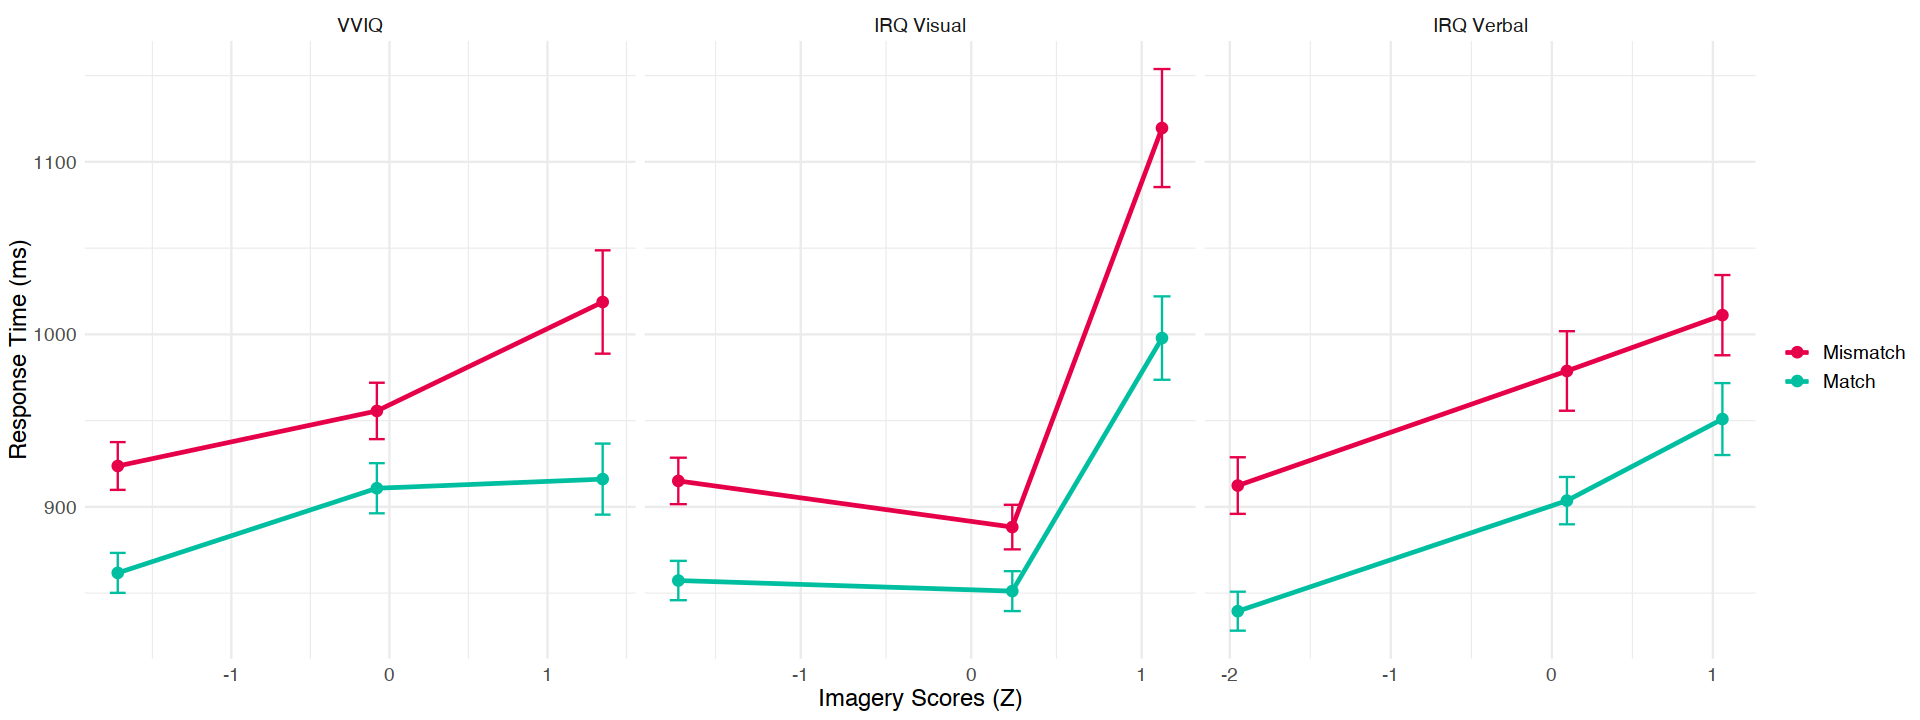

In [583]:
library(dplyr)
library(ggplot2)
library(forcats)
library(stringr)

# Base dataframe
df <- df_experimental %>%
  mutate(isMatch = recode(isMatch, "n" = "Mismatch", "y" = "Match"))

# ----- VVIQ RT -----
summary_vviq <- df %>%
  mutate(bin = cut_number(vviq_z, n = 3)) %>%
  group_by(bin, isMatch) %>%
  summarise(
    mean_rt = mean(rt_img, na.rm = TRUE),
    count_rt = n(),
    sd_rt = sd(rt_img, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    se_rt = sd_rt / sqrt(count_rt),
    ci68 = se_rt,
    bin_mid = bin %>%
      as.character() %>%
      str_extract_all("-?\\d+\\.*\\d*") %>%
      sapply(function(x) mean(as.numeric(x))),
    dimension = "VVIQ"
  )

# ----- IRQ Visual RT -----
summary_visual <- df %>%
  mutate(bin = cut_number(irq_visual_z, n = 3)) %>%
  group_by(bin, isMatch) %>%
  summarise(
    mean_rt = mean(rt_img, na.rm = TRUE),
    count_rt = n(),
    sd_rt = sd(rt_img, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    se_rt = sd_rt / sqrt(count_rt),
    ci68 = se_rt,
    bin_mid = bin %>%
      as.character() %>%
      str_extract_all("-?\\d+\\.*\\d*") %>%
      sapply(function(x) mean(as.numeric(x))),
    dimension = "IRQ Visual"
  )

# ----- IRQ Verbal RT -----
summary_verbal <- df %>%
  mutate(bin = cut_number(irq_verbal_z, n = 3)) %>%
  group_by(bin, isMatch) %>%
  summarise(
    mean_rt = mean(rt_img, na.rm = TRUE),
    count_rt = n(),
    sd_rt = sd(rt_img, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    se_rt = sd_rt / sqrt(count_rt),
    ci68 = se_rt,
    bin_mid = bin %>%
      as.character() %>%
      str_extract_all("-?\\d+\\.*\\d*") %>%
      sapply(function(x) mean(as.numeric(x))),
    dimension = "IRQ Verbal"
  )

# ----- Combine & Order -----
summary_combined <- bind_rows(summary_vviq, summary_visual, summary_verbal) %>%
  mutate(dimension = factor(dimension, levels = c("VVIQ", "IRQ Visual", "IRQ Verbal")))

# ----- Plot -----
color_map <- c("Mismatch" = "#e60049", "Match" = "#00bfa0")

options(repr.plot.width = 16, repr.plot.height = 6)

ggplot(summary_combined, aes(x = bin_mid, y = mean_rt, color = isMatch)) +
  geom_point(size = 2.5) +
  geom_errorbar(aes(ymin = mean_rt - ci68, ymax = mean_rt + ci68), width = 0.1) +
  geom_line(linewidth = 1) +
  scale_color_manual(values = color_map) +
  facet_wrap(~dimension, scales = "free_x", nrow = 1) +
  labs(x = "Imagery Scores (Z)", y = "Response Time (ms)", color = "") +
  theme_minimal() +
  theme(
    text = element_text(size = 14),
    legend.position = "right"
  )

In [584]:
library(dplyr)

# Set threshold (top 2.5% of sentence RTs)
upper_cutoff <- quantile(df_experimental$rt_sent, 0.975, na.rm = TRUE)

# Filter out unusually long RTs
df_clean <- df_experimental %>%
  filter(rt_sent <= upper_cutoff)


In [585]:
df_clean <- df_clean %>%
  mutate(rt_sent_z = scale(rt_sent)[, 1])  # scale returns a matrix

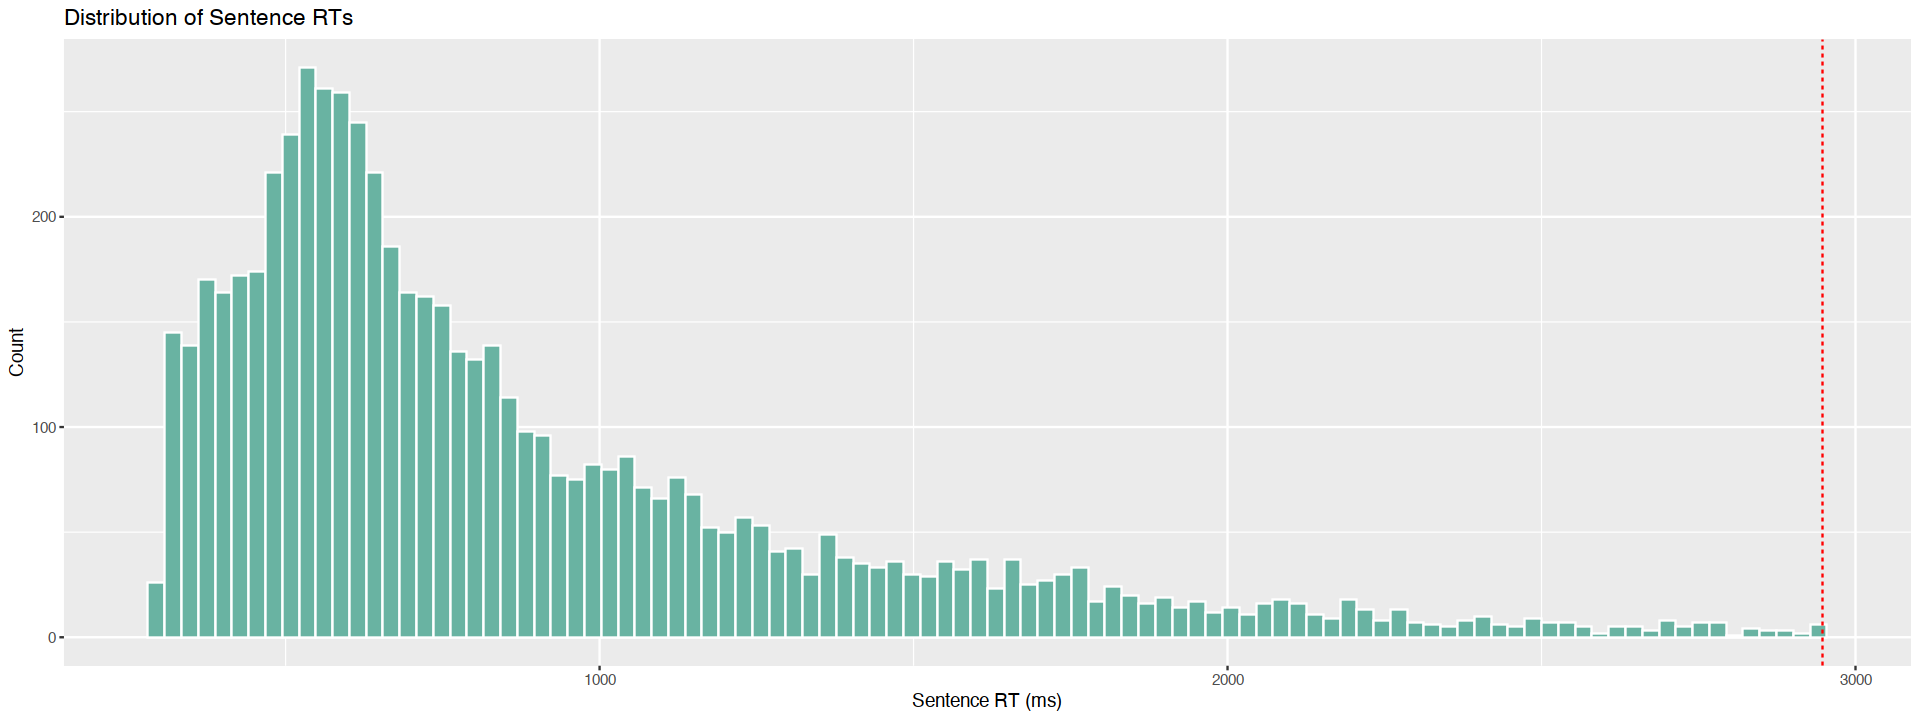

In [586]:
library(ggplot2)

ggplot(df_clean, aes(x = rt_sent)) +
  geom_histogram(bins = 100, fill = "#69b3a2", color = "white") +
  geom_vline(xintercept = upper_cutoff, color = "red", linetype = "dashed") +
  labs(title = "Distribution of Sentence RTs",
       x = "Sentence RT (ms)",
       y = "Count")


In [587]:
model_sent_rt <- lmer(data = df_clean,
                      rt_sent ~ vviq_z +
                      (1 | subject) +
                      (1 | trialIndex))
summary(model_sent_rt)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt_sent ~ vviq_z + (1 | subject) + (1 | trialIndex)
   Data: df_clean

REML criterion at convergence: 90187.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9584 -0.5795 -0.2633  0.2721  5.7285 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept)  89400   299.00  
 trialIndex (Intercept)   2649    51.47  
 Residual               162758   403.43  
Number of obs: 6050, groups:  subject, 111; trialIndex, 60

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  865.974     29.612 119.151  29.244   <2e-16 ***
vviq_z         4.579     28.911 108.781   0.158    0.874    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
       (Intr)
vviq_z 0.006 

In [588]:
#### RT model to be corrected!!!

# RT model (full dataset or adjust as needed)
model_compl_rt <- lmer(data = df_clean,
                      rt_img ~ isMatch * vviq_z * rt_sent_z +
                      (1 | subject) +
                      (1 | trialIndex))



cat("\n===== RT Model =====\n")
summary(model_compl_rt)


===== RT Model =====


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt_img ~ isMatch * vviq_z * rt_sent_z + (1 | subject) + (1 |  
    trialIndex)
   Data: df_clean

REML criterion at convergence: 91555.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2578 -0.3957 -0.1217  0.1963 29.0854 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept) 101071   317.92  
 trialIndex (Intercept)   9087    95.33  
 Residual               204502   452.22  
Number of obs: 6050, groups:  subject, 111; trialIndex, 60

Fixed effects:
                          Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                955.423     33.629  144.930  28.410  < 2e-16 ***
isMatchy                   -72.617     11.645 5876.029  -6.236  4.8e-10 ***
vviq_z                      53.712     31.340  116.149   1.714 0.089221 .  
rt_sent_z                   87.675      9.568 6003.960   9.163  < 2e-16 ***
isMatchy:vviq_z           

In [589]:
#### accuracy model to be corrected!!!

# Accuracy model
model_compl_acc <- glmer(data = df_clean,
                      hit ~ isMatch * vviq_z * rt_sent_z +
                      (1 | subject) +
                      (1 | trialIndex),
                    family = binomial)



cat("\n===== Accuract Model =====\n")
summary(model_compl_acc)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00507161 (tol = 0.002, component 1)”



===== Accuract Model =====


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: hit ~ isMatch * vviq_z * rt_sent_z + (1 | subject) + (1 | trialIndex)
   Data: df_clean

     AIC      BIC   logLik deviance df.resid 
  2017.4   2084.4   -998.7   1997.4     6040 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-16.5886   0.0884   0.1294   0.1930   2.6354 

Random effects:
 Groups     Name        Variance Std.Dev.
 subject    (Intercept) 1.688    1.299   
 trialIndex (Intercept) 1.089    1.044   
Number of obs: 6050, groups:  subject, 111; trialIndex, 60

Fixed effects:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)                3.67366    0.22304  16.471  < 2e-16 ***
isMatchy                   0.47698    0.13913   3.428 0.000608 ***
vviq_z                     0.13420    0.16117   0.833 0.405016    
rt_sent_z                 -0.26288    0.09382  -2.802 0.005078 ** 
isMatchy:vviq_z       

In [558]:
# #### Accuracy model to be corrected!!!

# # Accuracy model (full dataset or adjust as needed)
# model_compl_acc <- glmer(data = df_clean,
#                       hit ~ isMatch * vviq_z * rt_sent_z +
#                       (1 | subject) +
#                       (1 | trialIndex),
#                        family=binomial)



# cat("\n===== Accuracy Model =====\n")
# summary(model_compl_acc)

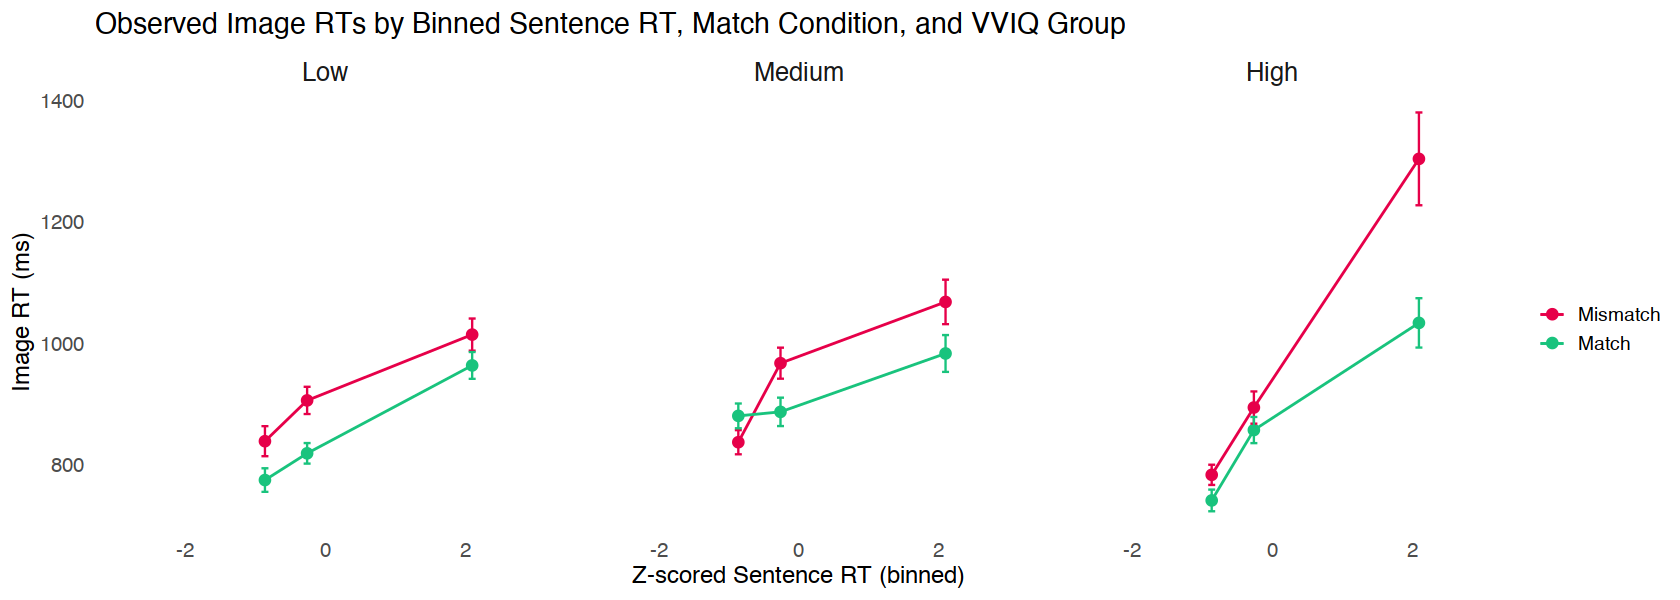

In [590]:
library(dplyr)
library(ggplot2)
library(forcats)
library(stringr)

# Adjust plot size (change these values as needed)
options(repr.plot.width = 14, repr.plot.height = 5)

# Step 0: Prep base df
df <- df_clean %>%
  mutate(
    isMatch = recode(isMatch, "n" = "Mismatch", "y" = "Match"),
    vviq_group = ntile(vviq_z, 3),
    vviq_group = factor(vviq_group, labels = c("Low", "Medium", "High"))
  )

# Step 1: Bin rt_sent_z into 3 quantiles
df <- df %>%
  mutate(bin = cut_number(rt_sent_z, n = 3))

# Step 2: Summarize
summary_plot <- df %>%
  group_by(bin, isMatch, vviq_group) %>%
  summarise(
    mean_rt = mean(rt_img, na.rm = TRUE),
    count = n(),
    sd_rt = sd(rt_img, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    se_rt = sd_rt / sqrt(count),
    ci68 = se_rt * qt(0.84, df = count - 1),
    bin_mid = bin %>%
      as.character() %>%
      str_extract_all("-?\\d+\\.*\\d*") %>%
      sapply(function(x) mean(as.numeric(x)))
  )

# Step 3: Plot
ggplot(summary_plot, aes(x = bin_mid, y = mean_rt, color = isMatch)) +
  geom_point(size = 2.5) +
  geom_errorbar(aes(ymin = mean_rt - ci68, ymax = mean_rt + ci68), width = 0.1) +
  geom_line(linewidth = 0.6) +
  scale_color_manual(values = c("Mismatch" = "#e60049", "Match" = "#19c37d")) +
  facet_wrap(~vviq_group, scales = "free_x", nrow = 1) +
  labs(
    x = "Z-scored Sentence RT (binned)",
    y = "Image RT (ms)",
    color = "",
    title = "Observed Image RTs by Binned Sentence RT, Match Condition, and VVIQ Group"
  ) +
  xlim(-3, 3) +  # Force x-axis range
  theme_minimal(base_size = 14) +
  theme(
    panel.grid = element_blank(),
    legend.position = "right",
    strip.text = element_text(size = 15),
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 14)
  )


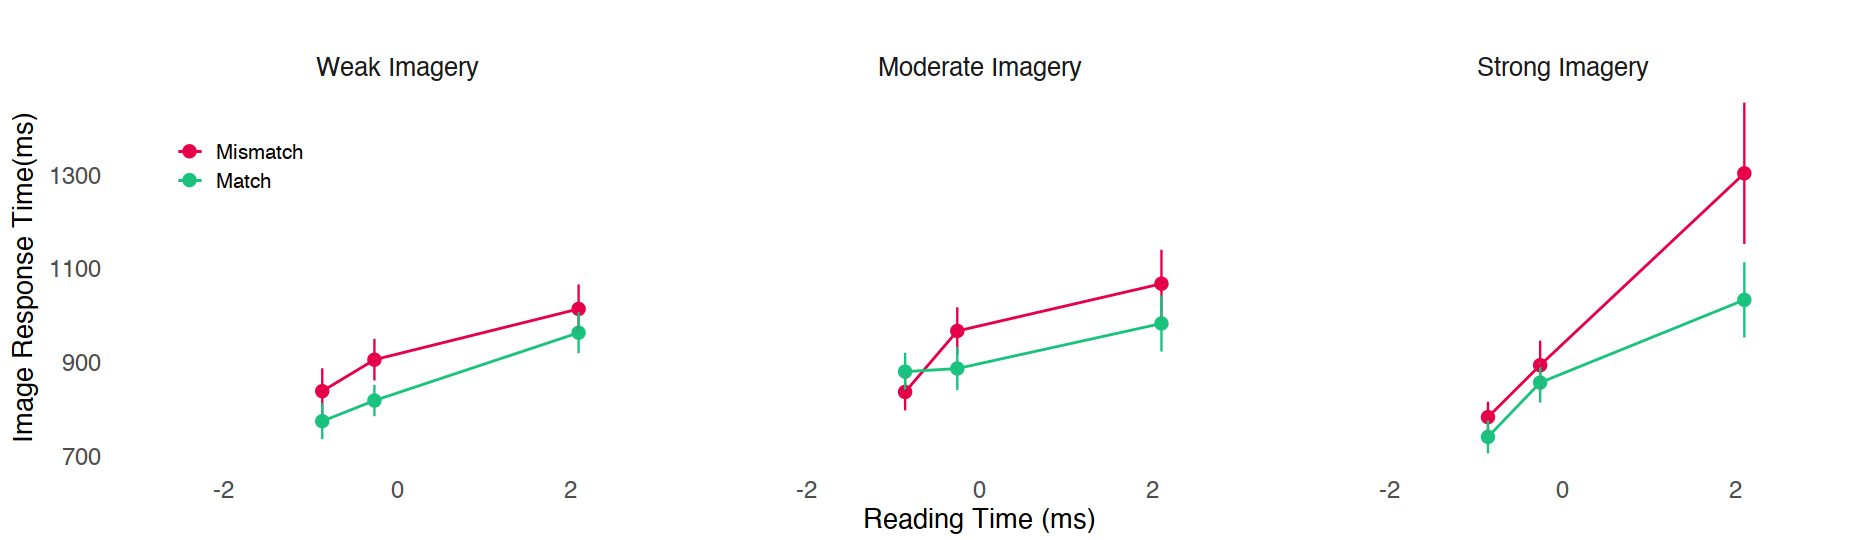

In [591]:
library(dplyr)
library(ggplot2)
library(forcats)
library(stringr)
library(grid)         # for unit()
library(gridExtra)    # if needed for more control
library(extrafont)    # optional: for custom fonts like DejaVu Sans

# Optional: Load fonts (only needs to be done once per session)
# font_import()  # Only if you haven’t imported before
# loadfonts(device = "win") # or "pdf", depending on your setup

# Set plot size (in inches)
options(repr.plot.width = 15.5, repr.plot.height = 4.5)

# Prep base df
df_rt <- df_clean %>%
  mutate(
    isMatch = recode(isMatch, "n" = "Mismatch", "y" = "Match"),
    vviq_group = ntile(vviq_z, 3),
    vviq_group = factor(vviq_group, labels = c("Weak Imagery", "Moderate Imagery", "Strong Imagery"))  # updated labels
  )

# Bin z-scored RT into 3 quantiles
df_rt <- df_rt %>%
  mutate(bin = cut_number(rt_sent_z, n = 3))

# Summarize
summary_plot_rt <- df_rt %>%
  group_by(bin, isMatch, vviq_group) %>%
  summarise(
    mean_rt = mean(rt_img, na.rm = TRUE),
    count = n(),
    sd_rt = sd(rt_img, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    se_rt = sd_rt / sqrt(count),
#     ci68 = se_rt * qt(0.84, df = count - 1),
    ci95 = se_rt * qt(0.975, df = count - 1),
    bin_mid = bin %>%
      as.character() %>%
      str_extract_all("-?\\d+\\.*\\d*") %>%
      sapply(function(x) mean(as.numeric(x)))
  )

# Plot
ggplot(summary_plot_rt, aes(x = bin_mid, y = mean_rt, color = isMatch)) +
  geom_point(size = 3) +
  geom_errorbar(aes(ymin = mean_rt - ci95, ymax = mean_rt + ci95), width = 0) +
  geom_line(linewidth = 0.6) +  # thicker lines
  scale_color_manual(values = c("Mismatch" = "#e60049", "Match" = "#19c37d")) +
  facet_wrap(~vviq_group, scales = "free_x", nrow = 1) +
  labs(
    x = "Reading Time (ms)",  # updated x label
    y = "Image Response Time(ms)",  # updated y label
    color = "",
    title = ""
  ) +
  xlim(-3, 3) +
  theme_minimal(base_size = 14) +
  theme(
    text = element_text(family = "DejaVu Sans"),  # match Python font style
    panel.grid = element_blank(),
    axis.text = element_text(size = 14, margin = margin(t = 6, r = 6, b = 6, l = 6)),  # tick padding
    axis.title.x = element_text(size = 16, margin = margin(t = 6)),
    axis.title.y = element_text(size = 16, margin = margin(r = 6)),
    strip.text = element_text(size = 15),
    legend.position = c(0.03, 0.97),  # top-left inside the first facet
    legend.justification = c("left", "top"),
    legend.background = element_rect(fill = "white", color = NA),
    legend.text = element_text(size = 12),  # updated legend font size
    plot.title = element_text(size = 16, face = "bold", margin = margin(b = 10))
  )


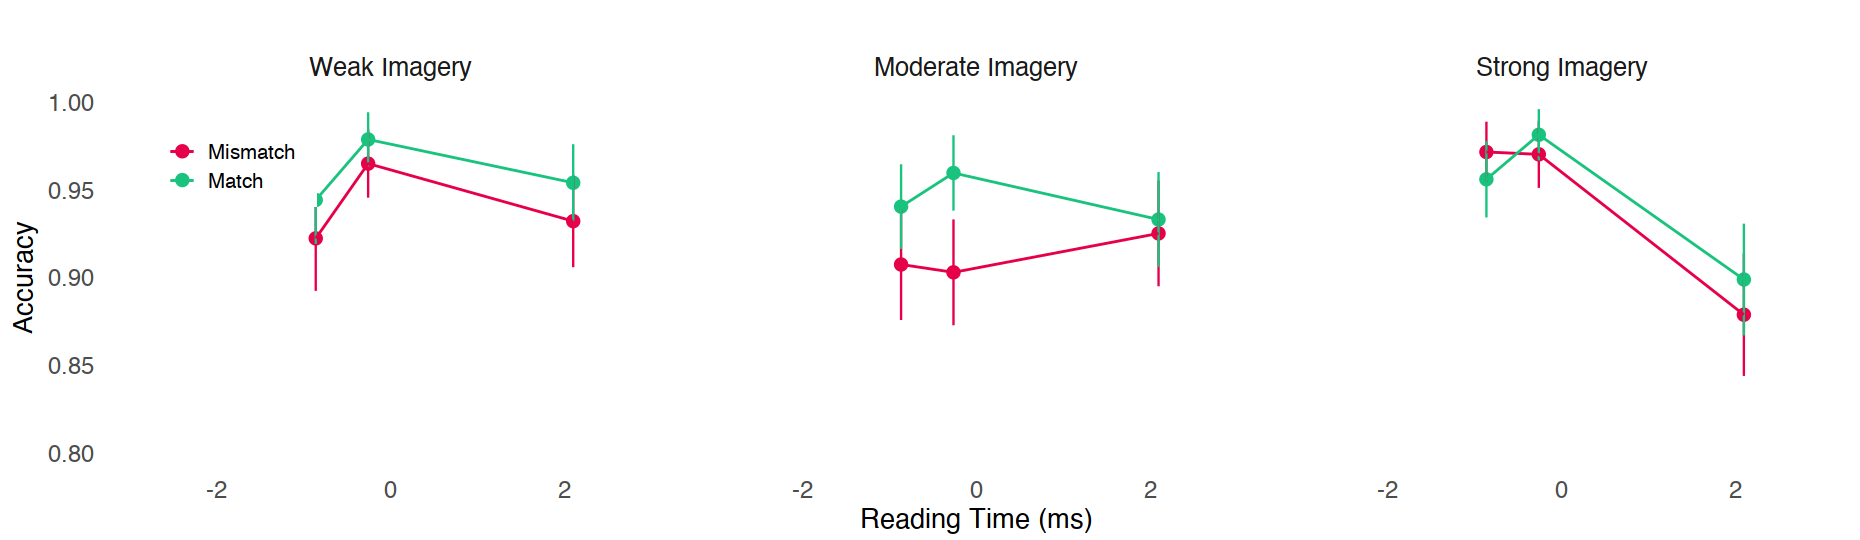

In [592]:
# Set plot size (in inches)
options(repr.plot.width = 15.5, repr.plot.height = 4.5)

# Prep base df
df <- df_clean %>%
  mutate(
    isMatch = recode(isMatch, "n" = "Mismatch", "y" = "Match"),
    vviq_group = ntile(vviq_z, 3),
    vviq_group = factor(vviq_group, labels = c("Weak Imagery", "Moderate Imagery", "Strong Imagery")),
    hit_numeric = as.numeric(as.character(hit))
  )

# Bin z-scored RT into 3 quantiles
df <- df %>%
  mutate(bin = cut_number(rt_sent_z, n = 3))

# Summarize accuracy
summary_plot_acc <- df %>%
  group_by(bin, isMatch, vviq_group) %>%
  summarise(
    mean_acc = mean(hit_numeric, na.rm = TRUE),
    count = n(),
    sd_acc = sd(hit_numeric, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    se_acc = sd_acc / sqrt(count),
    ci95 = se_acc * qt(0.975, df = count - 1),
    bin_mid = bin %>%
      as.character() %>%
      str_extract_all("-?\\d+\\.*\\d*") %>%
      sapply(function(x) mean(as.numeric(x)))
  )

# Plot accuracy
ggplot(summary_plot_acc, aes(x = bin_mid, y = mean_acc, color = isMatch)) +
  geom_point(size = 3) +
  geom_errorbar(aes(ymin = mean_acc - ci95, ymax = mean_acc + ci95), width = 0) +
  geom_line(linewidth = 0.6) +
  scale_color_manual(values = c("Mismatch" = "#e60049", "Match" = "#19c37d")) +
  facet_wrap(~vviq_group, scales = "free_x", nrow = 1) +
  labs(
    x = "Reading Time (ms)",
    y = "Accuracy",
    color = "",
    title = ""
  ) +
  xlim(-3, 3) +
  ylim(0.8, 1.0) +
  theme_minimal(base_size = 14) +
  theme(
    text = element_text(family = "DejaVu Sans"),
    panel.grid = element_blank(),
    axis.text = element_text(size = 14, margin = margin(t = 6, r = 6, b = 6, l = 6)),
    axis.title.x = element_text(size = 16, margin = margin(t = 6)),
    axis.title.y = element_text(size = 16, margin = margin(r = 6)),
    strip.text = element_text(size = 15),
    legend.position = c(0.03, 0.97),
    legend.justification = c("left", "top"),
    legend.background = element_rect(fill = "white", color = NA),
    legend.text = element_text(size = 12),
    plot.title = element_text(size = 16, face = "bold", margin = margin(b = 10))
  )


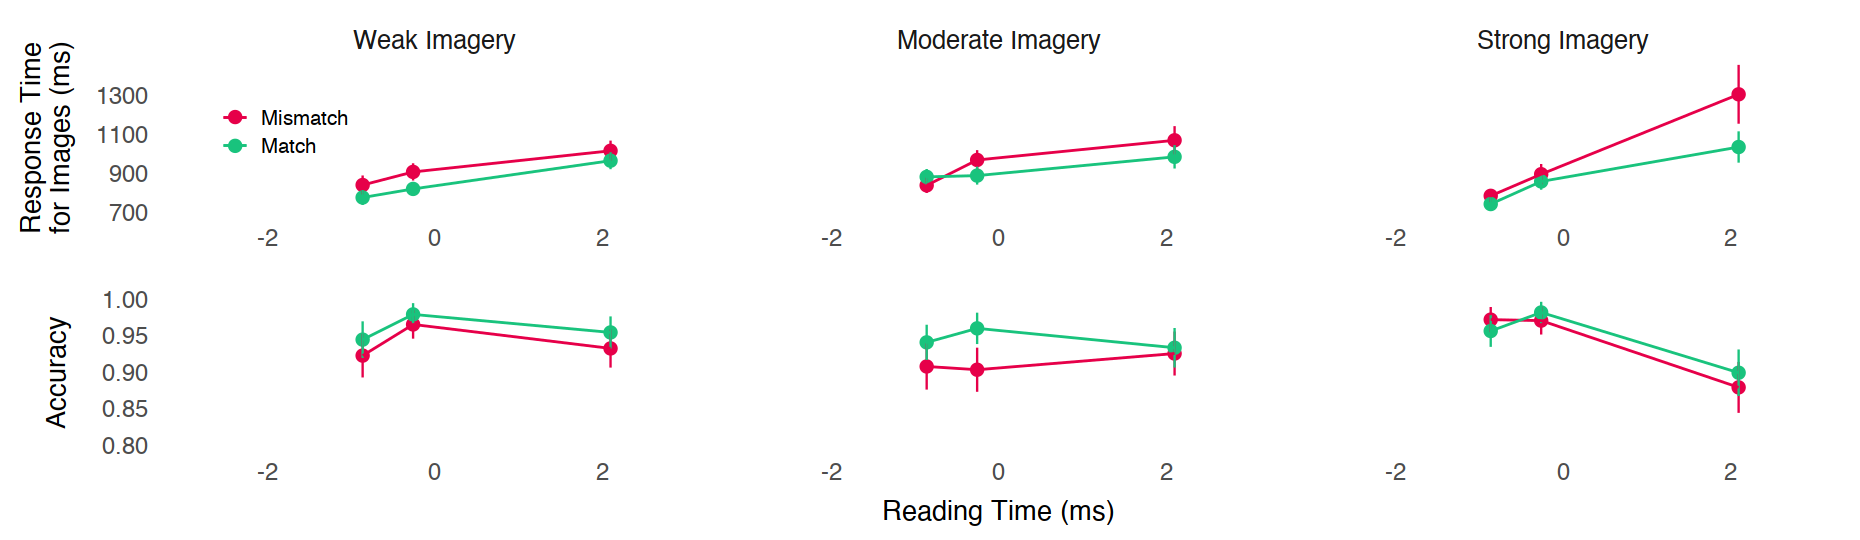

In [593]:
# === RT Plot ===
p_rt <- ggplot(summary_plot_rt, aes(x = bin_mid, y = mean_rt, color = isMatch)) +
  geom_point(size = 3) +
  geom_errorbar(aes(ymin = mean_rt - ci95, ymax = mean_rt + ci95), width = 0) +
  geom_line(linewidth = 0.6) +
  scale_color_manual(values = c("Mismatch" = "#e60049", "Match" = "#19c37d")) +
  facet_wrap(~vviq_group, scales = "free_x", nrow = 1) +
  labs(
    x = "",
    y = "Response Time\nfor Images (ms)",
    color = ""
  ) +
  xlim(-3, 3) +
  theme_minimal(base_size = 14) +
  theme(
    text = element_text(family = "DejaVu Sans"),
    panel.grid = element_blank(),
    axis.text = element_text(size = 14, margin = margin(t = 6, r = 6, b = 6, l = 6)),
    axis.title.y = element_text(vjust = 0.5,size = 16, margin = margin(r = 12)),
    strip.text = element_text(size = 15),
    legend.position = c(0.03, 0.97),
    legend.justification = c("left", "top"),
    legend.background = element_rect(fill = "white", color = NA),
    legend.text = element_text(size = 12)
  )

# === Accuracy Plot ===
p_acc <- ggplot(summary_plot_acc, aes(x = bin_mid, y = mean_acc, color = isMatch)) +
  geom_point(size = 3) +
  geom_errorbar(aes(ymin = mean_acc - ci95, ymax = mean_acc + ci95), width = 0) +
  geom_line(linewidth = 0.6) +
  scale_color_manual(values = c("Mismatch" = "#e60049", "Match" = "#19c37d")) +
  facet_wrap(~vviq_group, scales = "free_x", nrow = 1) +
  labs(
    x = "Reading Time (ms)",
    y = "Accuracy",
    color = ""
  ) +
  xlim(-3, 3) +
  ylim(0.8, 1.0) +
  theme_minimal(base_size = 14) +
  theme(
    text = element_text(family = "DejaVu Sans"),
    panel.grid = element_blank(),
    axis.text = element_text(size = 14, margin = margin(t = 6, r = 6, b = 6, l = 6)),
    axis.title.y = element_text(vjust = 0.5,size = 16, margin = margin(t = 12)),
    axis.title.x = element_text(vjust = 0.5,size = 16, margin = margin(t = 12)),
    strip.text = element_blank(),  # Hide facet labels to avoid repeating
    legend.position = "none"       # Hide duplicate legend
  )


# Combine RT (top) and Accuracy (bottom) with equal heights
combined_plot <- p_rt / p_acc + plot_layout(heights = c(5, 5))

# Save the combined plot as PDF
ggsave("rt_accuracy_combined.pdf", plot = combined_plot, width = 15.5, height = 10, device = cairo_pdf)

# Optional: Save as PNG too (for slides/posters)
ggsave("rt_accuracy_combined.png", plot = combined_plot, width = 15.5, height = 10, dpi = 300)

combined_plot

In [432]:
df_match <- df_clean %>% filter(isMatch == "y")
df_mismatch <- df_clean %>% filter(isMatch == "n")